<a href="https://colab.research.google.com/github/xy9012/portfolio_optimization-ef-/blob/main/Portfolio_optimization(ef).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Description: This program attempts to optimize a users portfolio using efficient frontier

In [1]:
#Import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Get the stock symbols/stickers in the portfolio
#FAANG
assets = ['FB','AMZN','AAPL','NFLX','GOOG']

In [3]:
#Assign weights to the stocks
weights = np.array([0.2,0.2,0.2,0.2,0.2])

In [4]:
#Get the portfolio starting date
stockStartDate = '2013-01-01'

In [7]:
#Get the stocks ending date (today)
today = datetime.today().strftime('%Y-%m-%d')
today

'2020-11-23'

In [9]:
#Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

#Store the adjusted close price of te stock in to the df
for stock in assets:
  df[stock] = web.DataReader(stock, data_source='yahoo', start = stockStartDate, end = today)['Adj Close']

In [10]:
#Show the df
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,16.926661,13.144286,360.274597
2013-01-03,27.770000,258.480011,16.713015,13.798572,360.483826
2013-01-04,28.760000,259.149994,16.247477,13.711429,367.607117
2013-01-07,29.420000,268.459991,16.151909,14.171429,366.003143
2013-01-08,29.059999,266.380005,16.195379,13.880000,365.280823
...,...,...,...,...,...
2020-11-17,275.000000,3135.659912,119.389999,480.630005,1770.150024
2020-11-18,271.970001,3105.459961,118.029999,481.790009,1746.780029
2020-11-19,272.940002,3117.020020,118.639999,484.670013,1763.920044


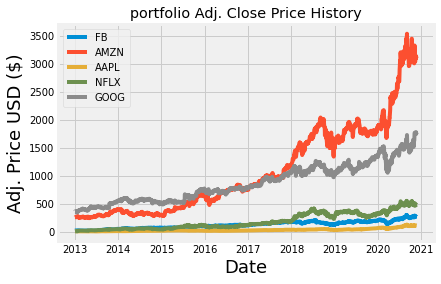

In [11]:
#Visually show the stock/portfolio
title = 'portfolio Adj. Close Price History'

#Get the stocks
my_stocks = df

#Create and plot the graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c],label = c)

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Price USD ($)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc = 'upper left')
plt.show()


In [12]:
#Show the daily simple return
returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002691,-0.020565,-0.001974
...,...,...,...,...,...
2020-11-17,-0.014196,0.001469,-0.007564,0.003193,-0.006304
2020-11-18,-0.011018,-0.009631,-0.011391,0.002414,-0.013202
2020-11-19,0.003567,0.003722,0.005168,0.005978,0.009812


In [13]:
#Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.119544,0.055507,0.045029,0.056919,0.050707
AMZN,0.055507,0.094871,0.040062,0.063824,0.048177
AAPL,0.045029,0.040062,0.081807,0.035187,0.038829
NFLX,0.056919,0.063824,0.035187,0.212509,0.049059
GOOG,0.050707,0.048177,0.038829,0.049059,0.066411


In [15]:
#Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual,weights))
port_variance

0.061669770059790505

In [16]:
#Calculate the portfolio volatility aka standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.24833398893383585

In [17]:
#Calculate the annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights)*252
portfolioSimpleAnnualReturn

0.35703066165589875

In [19]:
#Show the expected annual return, volatility (risk), and variance
percent_var = str(round(port_variance,2)*100) + '%'
percent_vols = str(round(port_volatility,2)*100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn,2)*100)+ '%'

print('Expected annual return: ' + percent_ret)
print('Annual volatility/risk: ' + percent_vols)
print('Annual variance: ' + percent_var)

Expected annual return: 36.0%
Annual volatility/risk: 25.0%
Annual variance: 6.0%


In [21]:
pip install PyPortfolioOpt

In [22]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [23]:
#Portfolio  Optimization

#Calculate the expected returns and the anunualised sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

#Optimize for max sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)


OrderedDict([('FB', 0.0936), ('AMZN', 0.32016), ('AAPL', 0.24493), ('NFLX', 0.34131), ('GOOG', 0.0)])
Expected annual return: 41.5%
Annual volatility: 27.5%
Sharpe Ratio: 1.44


(0.4151647602821591, 0.27491519542900267, 1.4374060323057372)

In [24]:
0.0936 + 0.32016 + 0.24493 + 0.34131

1.0

In [27]:
#Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices =  get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 15000)

allocation, leftover = da.lp_portfolio()
print('Discret allocation: ', allocation)
print('Fund Remaining: ${:.2F}'.format(leftover))

Discret allocation:  {'FB': 4, 'AMZN': 2, 'AAPL': 29, 'NFLX': 9}
Fund Remaining: $8.68
